In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet

In [3]:
avocado_df = pd.read_csv('avocado.csv')
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
avocado_df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [5]:
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
avocado_df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [8]:
avocado_df = avocado_df.sort_values('Date')

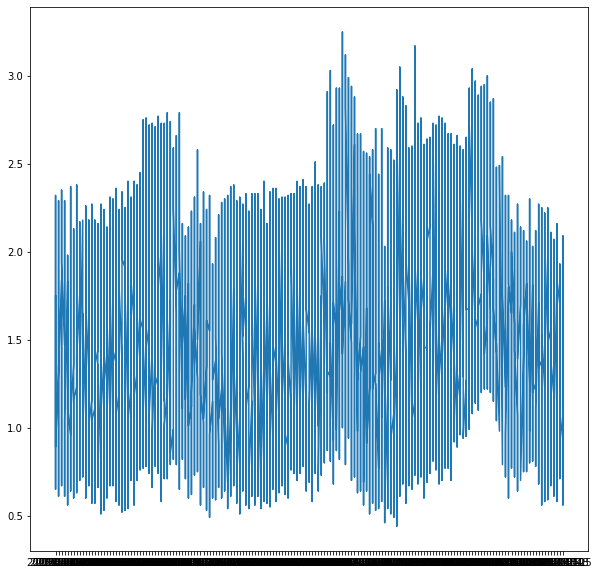

In [9]:
plt.figure(figsize = (10,10))
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])

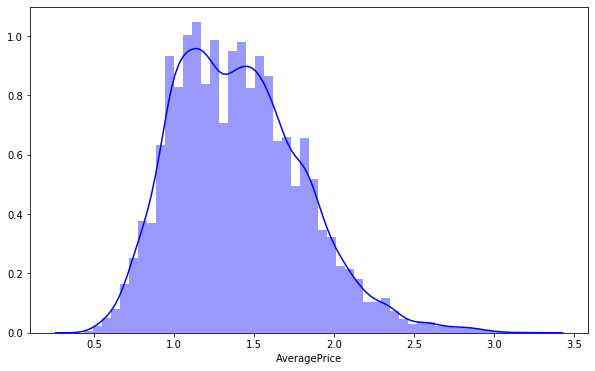

In [10]:
plt.figure(figsize = (10,6))
sns.distplot(avocado_df['AveragePrice'], color = 'b')

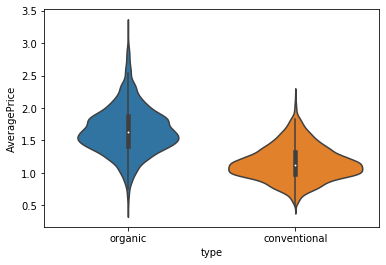

In [11]:
sns.violinplot(y = 'AveragePrice', x = 'type', data = avocado_df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text xticklabel objects>)

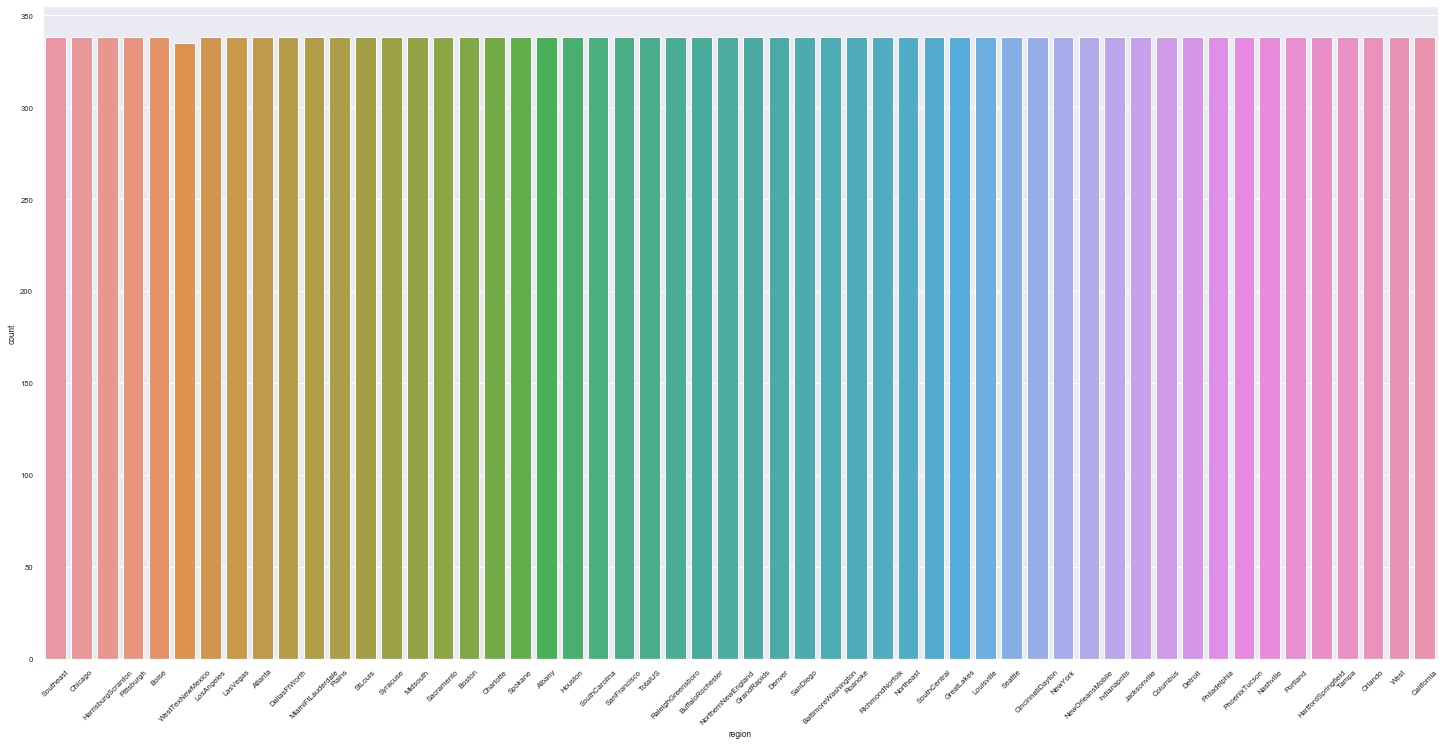

In [13]:
sns.set(font_scale = 0.7)
plt.figure(figsize = [25,12])
sns.countplot(x = 'region', data = avocado_df)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

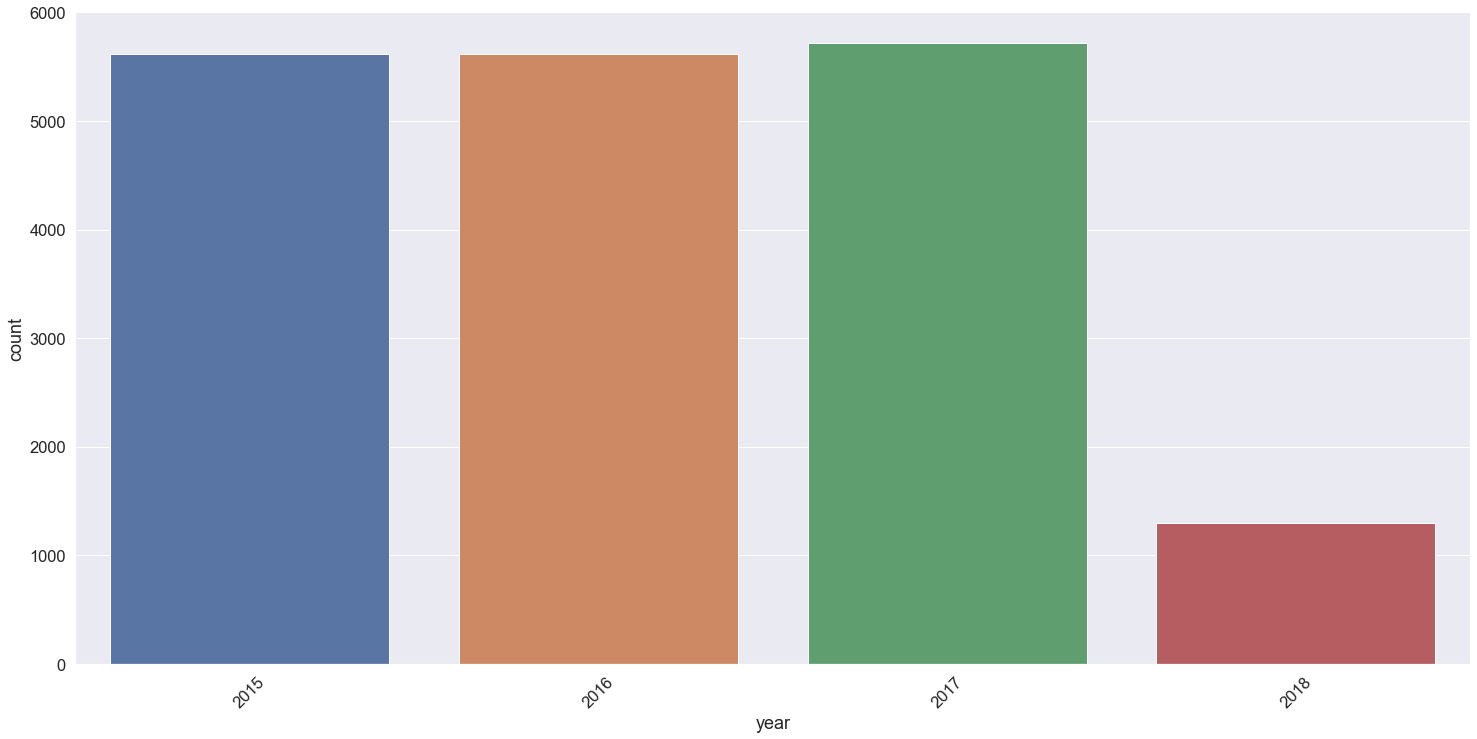

In [14]:
sns.set(font_scale = 1.5)
plt.figure(figsize = [25,12])
sns.countplot(x = 'year', data = avocado_df)
plt.xticks(rotation = 45)

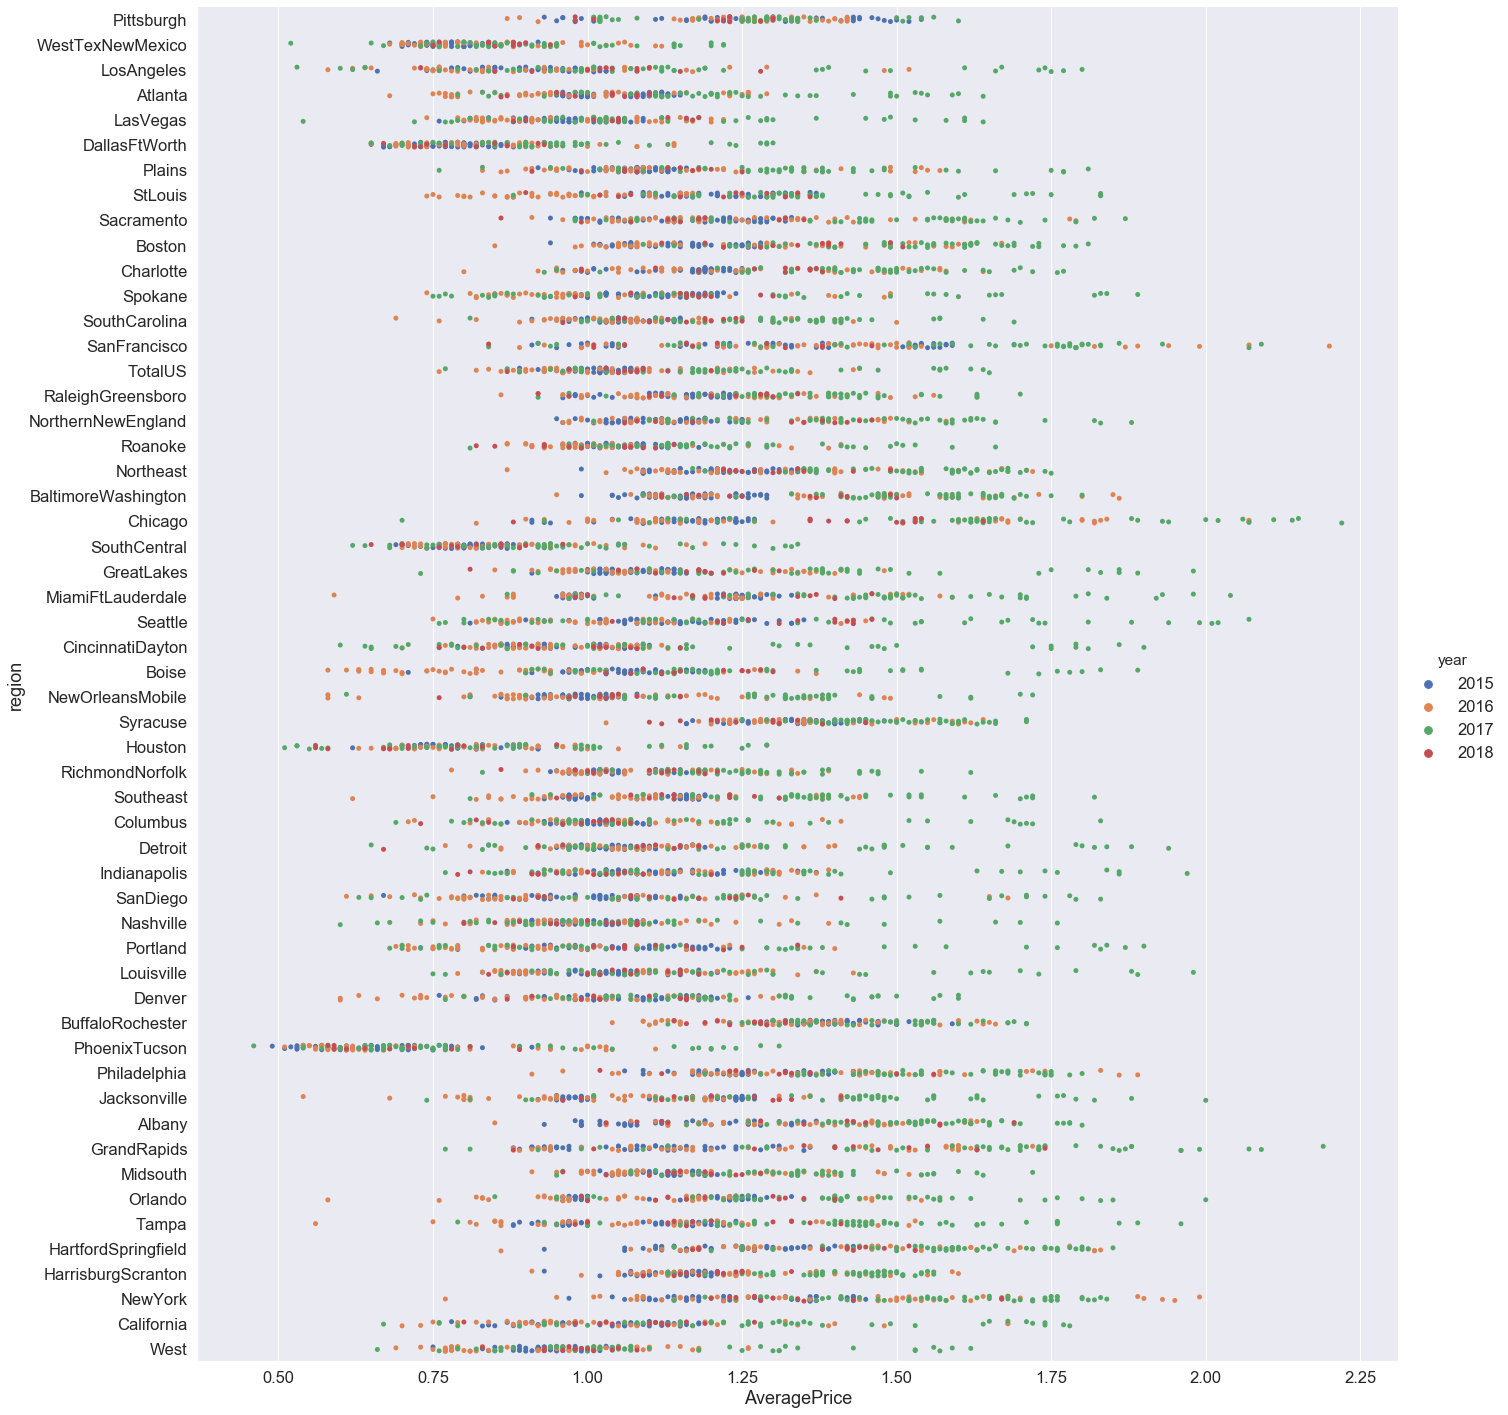

In [16]:
conventional = sns.catplot('AveragePrice', 'region', data = avocado_df[avocado_df['type'] == 'conventional'],
                          hue = 'year', height = 20)

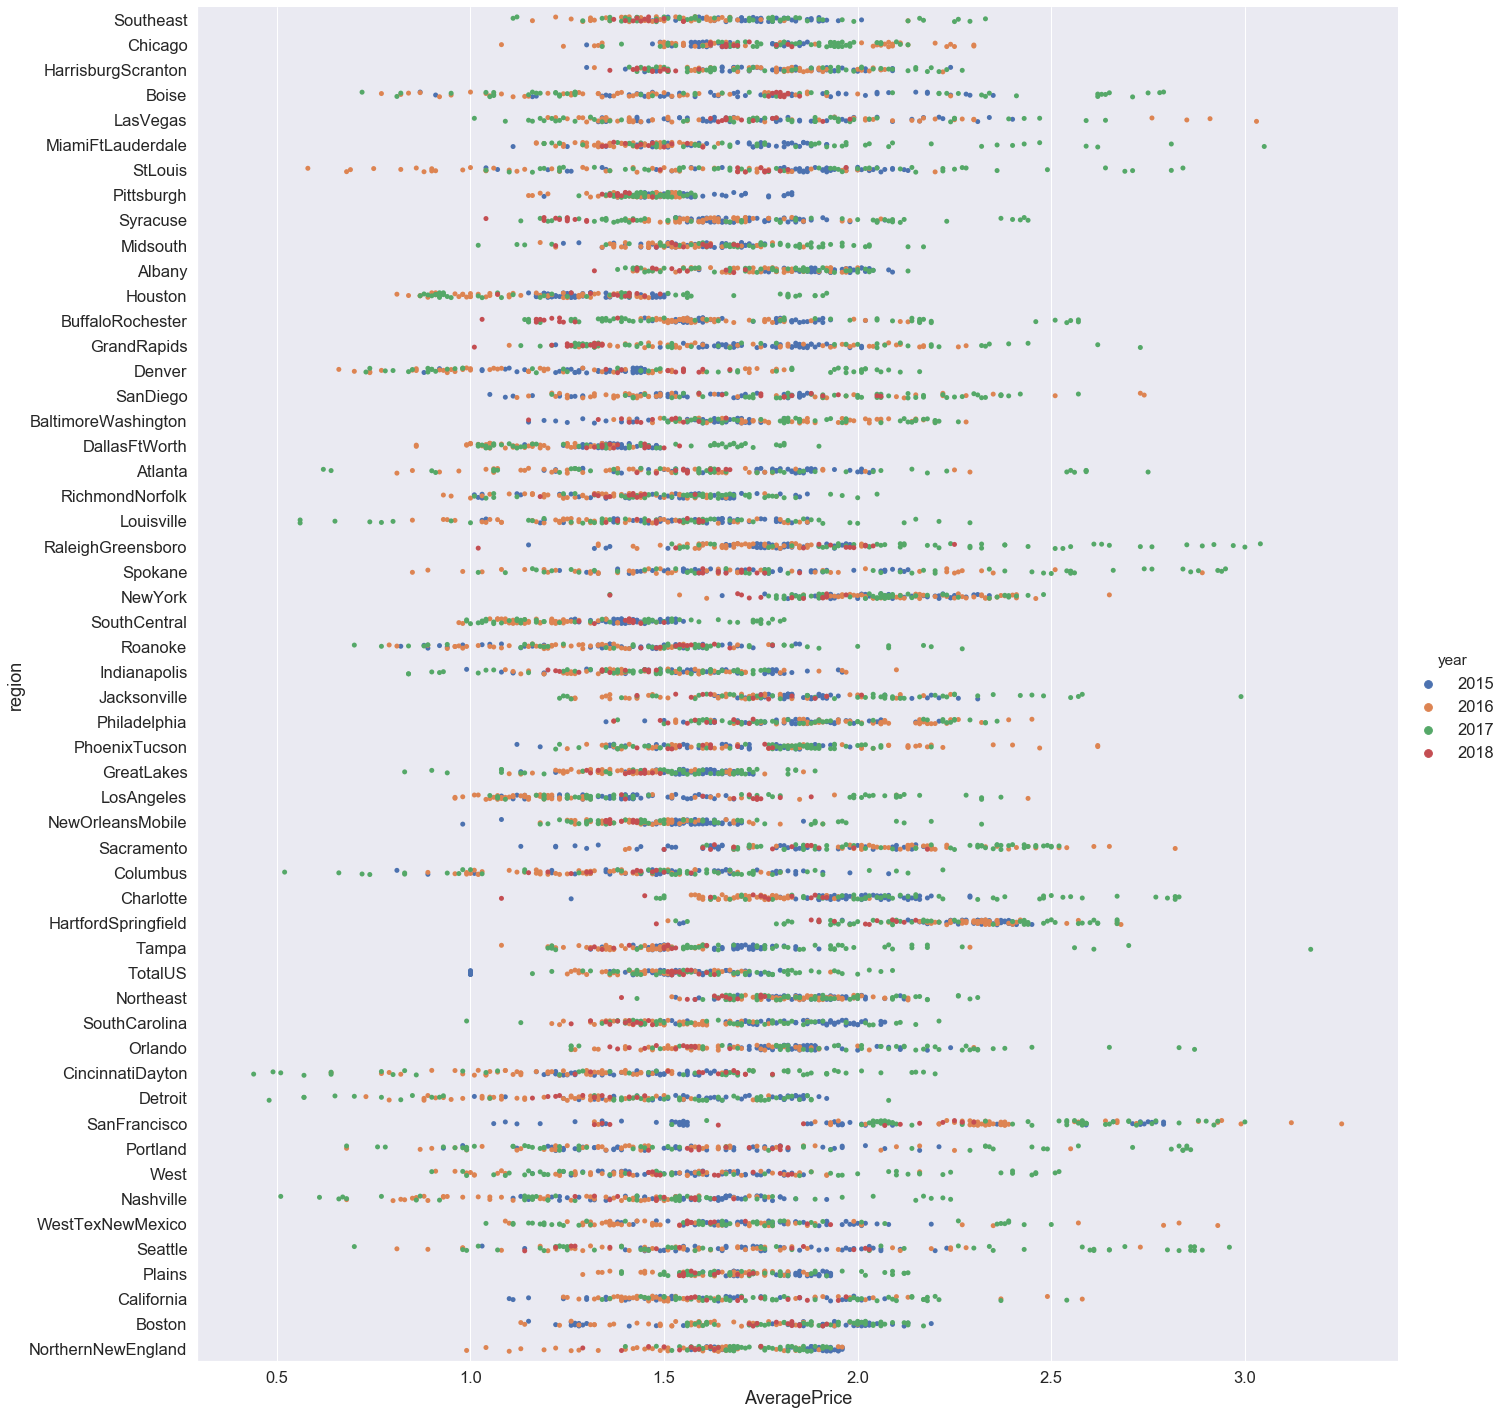

In [17]:
organic = sns.catplot('AveragePrice', 'region', data = avocado_df[avocado_df['type'] == 'organic'],
                          hue = 'year', height = 20)

In [20]:
avocado_prophet_df = avocado_df[['Date', 'AveragePrice']]
avocado_prophet_df

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [21]:
avocado_prophet_df = avocado_prophet_df.rename(columns = {'Date':'ds', 'AveragePrice':'y'})

In [22]:
m = Prophet()
m.fit(avocado_prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [24]:
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

In [25]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.495133,0.867196,1.866138,1.495133,1.495133,-0.112183,-0.112183,-0.112183,-0.112183,-0.112183,-0.112183,0.0,0.0,0.0,1.382950
1,2015-01-04,1.495133,0.898423,1.849043,1.495133,1.495133,-0.112183,-0.112183,-0.112183,-0.112183,-0.112183,-0.112183,0.0,0.0,0.0,1.382950
2,2015-01-04,1.495133,0.905298,1.877451,1.495133,1.495133,-0.112183,-0.112183,-0.112183,-0.112183,-0.112183,-0.112183,0.0,0.0,0.0,1.382950
3,2015-01-04,1.495133,0.913015,1.854559,1.495133,1.495133,-0.112183,-0.112183,-0.112183,-0.112183,-0.112183,-0.112183,0.0,0.0,0.0,1.382950
4,2015-01-04,1.495133,0.896859,1.869942,1.495133,1.495133,-0.112183,-0.112183,-0.112183,-0.112183,-0.112183,-0.112183,0.0,0.0,0.0,1.382950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18609,2019-03-21,1.161735,0.576723,1.569771,0.970799,1.348999,-0.086177,-0.086177,-0.086177,-0.086177,-0.086177,-0.086177,0.0,0.0,0.0,1.075558
18610,2019-03-22,1.161005,0.505186,1.567703,0.969167,1.349156,-0.084525,-0.084525,-0.084525,-0.084525,-0.084525,-0.084525,0.0,0.0,0.0,1.076480
18611,2019-03-23,1.160275,0.554664,1.651858,0.967506,1.349351,-0.082601,-0.082601,-0.082601,-0.082601,-0.082601,-0.082601,0.0,0.0,0.0,1.077674
18612,2019-03-24,1.159545,0.563214,1.620063,0.965844,1.349198,-0.080424,-0.080424,-0.080424,-0.080424,-0.080424,-0.080424,0.0,0.0,0.0,1.079120


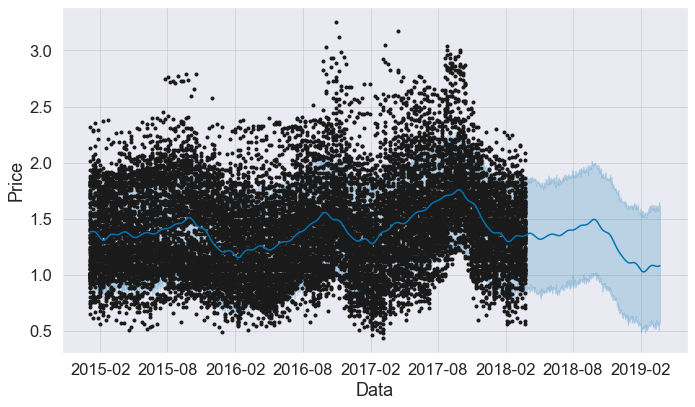

In [28]:
figure = m.plot(forecast, xlabel = 'Data', ylabel = 'Price')

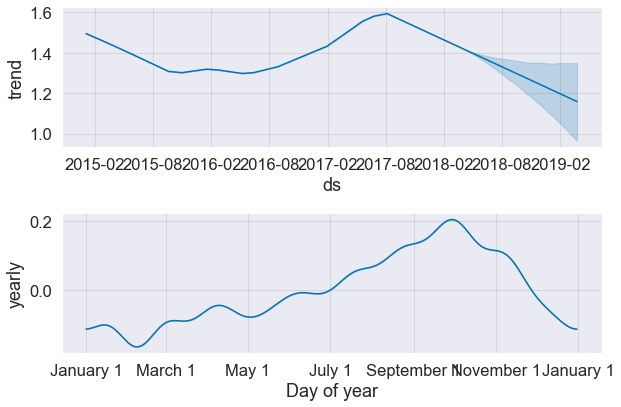

In [31]:
figure2 = m.plot_components(forecast)

REGION SPECIFIC PREDICTIONS

In [32]:
avocado_df = pd.read_csv('avocado.csv')

In [33]:
avocado_df_sample = avocado_df[avocado_df['region'] == 'West']

In [ ]:
avocado_df_sample = avocado_df_sample.sort_values('Date')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


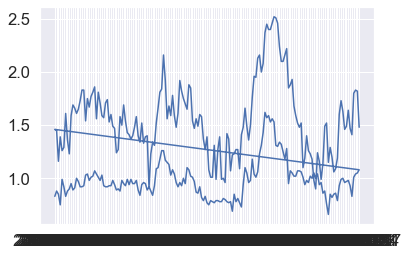

In [34]:
plt.plot(avocado_df_sample['Date'], avocado_df_sample['AveragePrice'])

In [35]:
avocado_df_sample = avocado_df_sample.rename(columns = {'Date':'ds', 'AveragePrice':'y'})

In [36]:
m = Prophet()
m.fit(avocado_df_sample)
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


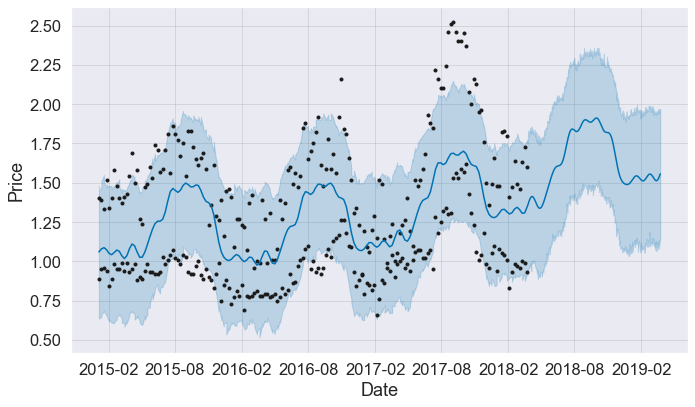

In [38]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Price')

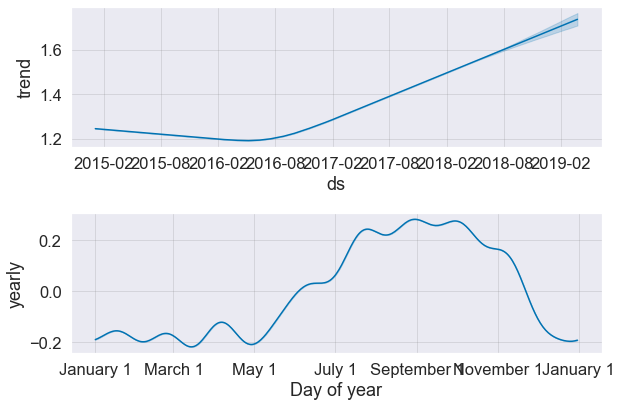

In [40]:
figure2 = m.plot_components(forecast)